### 2D Diffusion

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import time

%matplotlib inline

class field_2D:
    def __init__(self, nx, len_x, ny, len_y, nt, sigma, nu):
        
        dx = len_x/(nx-1)
        dy = len_y/(ny-1)
        dt = dx * dy * sigma / nu 
        
        x = np.linspace(0, len_x, nx)
        y = np.linspace(0, len_y, ny)
        t = np.linspace(0, dt*(nt), nt)
        
        self.x = x
        self.y = y
        self.t = t
        self.nx = nx
        self.dx = dx
        self.ny = ny
        self.dy = dy
        self.nt = nt
        self.dt = dt
        self.nu = nu
        self.grid = np.ones((nx,ny,nt))

In [67]:
field = field_2D(31, 2, 31, 2, 17,.25, .05)

### Initial Condition

In [68]:
field.grid[int(.5 / field.dy):int(1 / field.dy + 1),int(.5 / field.dx):int(1 / field.dx + 1),0] = 2

In [69]:
def plot(field, t):
    grid = field.grid[:,:,t]
    x = field.x
    y = field.y
    
    xs, ys = np.meshgrid(x,y)

    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    ax.plot_surface(xs, ys, grid, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.set_zlim(1, 2.5)
    
    plt.show()

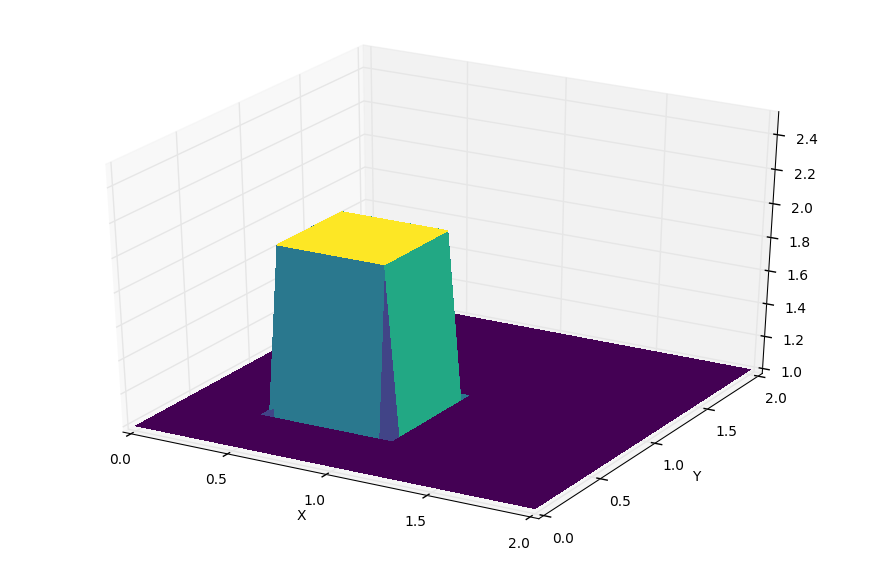

In [70]:
plot(field, 0)

In [71]:
def update_loop(field):
    u = field.grid
    nt = field.nt
    dt = field.dt
    dx = field.dx
    dy = field.dy
    nu = field.nu
    
    for n in range(nt-1): 
        u[1:-1, 1:-1, n+1] = (u[1:-1,1:-1, n] + 
                        nu * dt / dx**2 * 
                        (u[1:-1, 2:, n] - 2 * u[1:-1, 1:-1, n] + u[1:-1, 0:-2, n]) +
                        nu * dt / dy**2 * 
                        (u[2:,1: -1, n] - 2 * u[1:-1, 1:-1, n] + u[0:-2, 1:-1, n]))

In [72]:
update_vector(field)

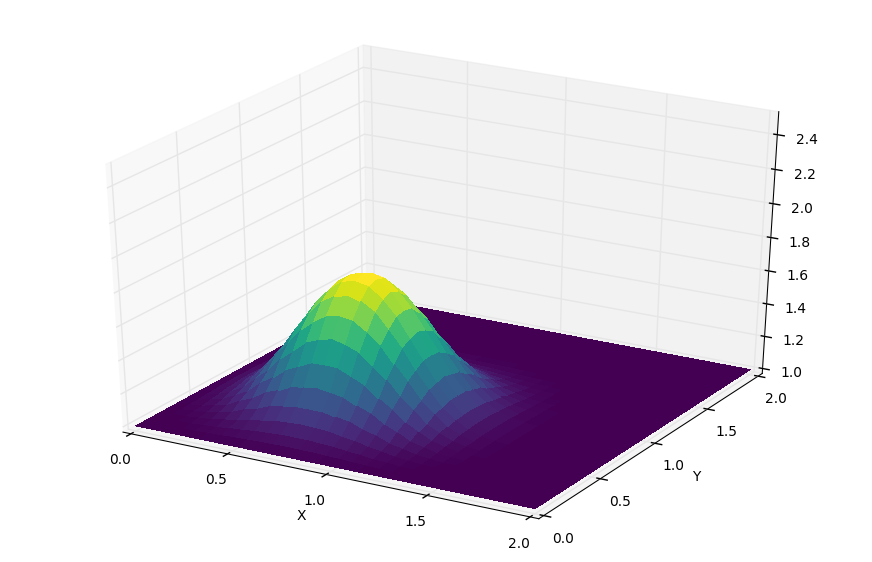

In [73]:
plot(field, 16)